In [8]:
# Step 1:
# Load dataset using pandas
# Import NumPy for Numerical Operations
# Import Matplotlib for Visualiation
# Import seaborn for visualization


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [9]:
# Step 2: Set Seaborn Style for Better Visual Appeal

sns.set_style("darkgrid")

In [10]:
# Step 3: Upload Dataset from Local System to Colab

from google.colab import files
uploaded = files.upload()


Saving owid-covid-data.csv to owid-covid-data (1).csv


In [14]:
# Step 4: Read the CSV File into a DataFrame

df = pd.read_csv("owid-covid-data.csv")


In [15]:
# Step 5: Display few rows of the dataset

df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [16]:
# Step 6: Check for missing values

df.isnull().sum()

,0
iso_code,0
continent,26525
location,0
date,0
total_cases,17631
...,...
population,0
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality,416024


In [17]:
# Step 7: Filter and Keep Only the Required Columns from the Dataset

df = df[['date', 'location', 'total_cases', 'new_cases', 'total_deaths', 'population', 'continent']]

In [18]:
# Step 8: Drop Rows with Missing Location or Total Cases

df = df.dropna(subset=['location', 'total_cases'])

<Axes: xlabel='location'>

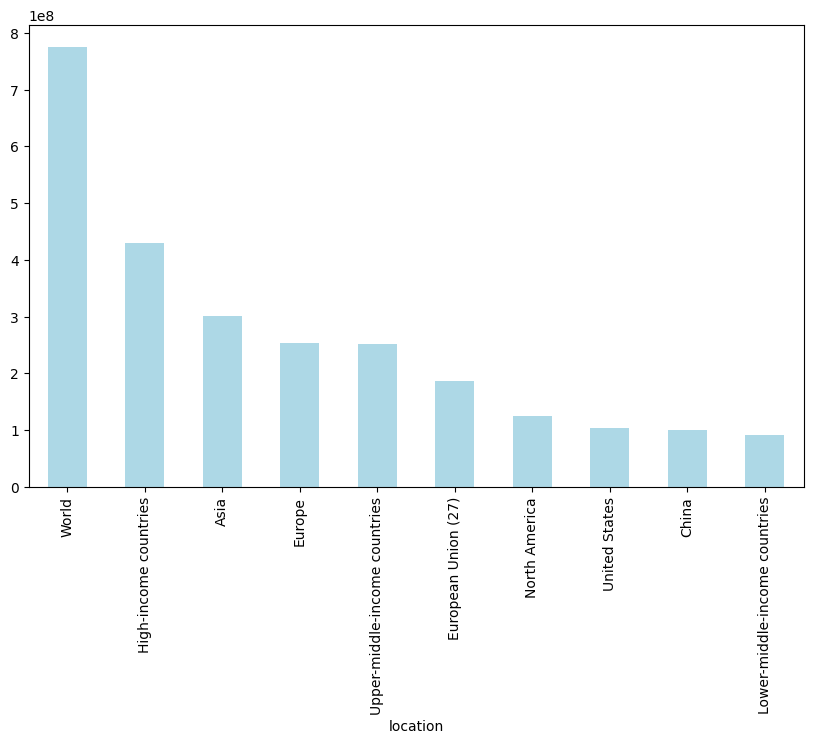

In [34]:
# Step 9: Plot Top 10 Countries by Total COVID-19 Cases with Light Blue Bars and White Background

# Top‑10 countries by total cases
latest  = df[df['date'] == df['date'].max()]
top_10  = latest.groupby('location')['total_cases'].sum() \
               .sort_values(ascending=False).head(10)

# Plot with white background (default) and light‑blue bars
plt.style.use('default')                      # ensures white background
top_10.plot(kind='bar',
            figsize=(10, 6),
            color='#ADD8E6')




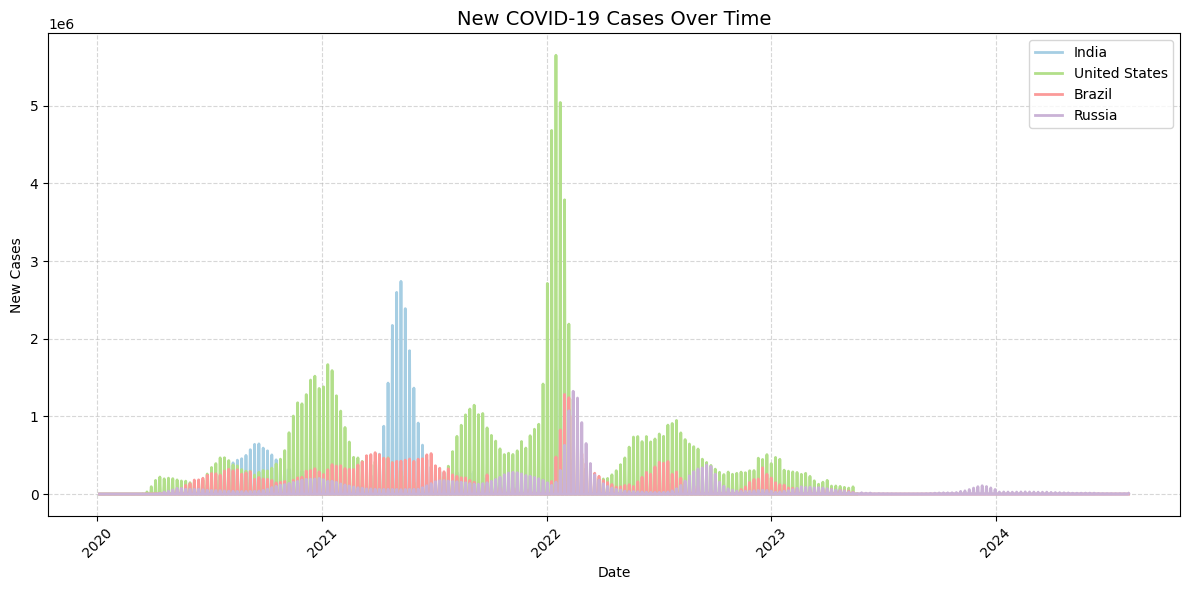

In [35]:
# Step 10: Plot New COVID-19 Cases Over Time for Selected Countries with Custom Colors

colors = {
    'India': '#A6CEE3',          # light blue
    'United States': '#B2DF8A',  # light green
    'Brazil': '#FB9A99',         # light red/pink
    'Russia': '#CAB2D6'          # soft lavender
}

selected_countries = ['India', 'United States', 'Brazil', 'Russia']

plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df[df['location'] == country]
    plt.plot(
        pd.to_datetime(country_data['date']),
        country_data['new_cases'],
        label=country,
        color=colors[country],
        linewidth=2
    )

# Chart customization
plt.title("New COVID-19 Cases Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

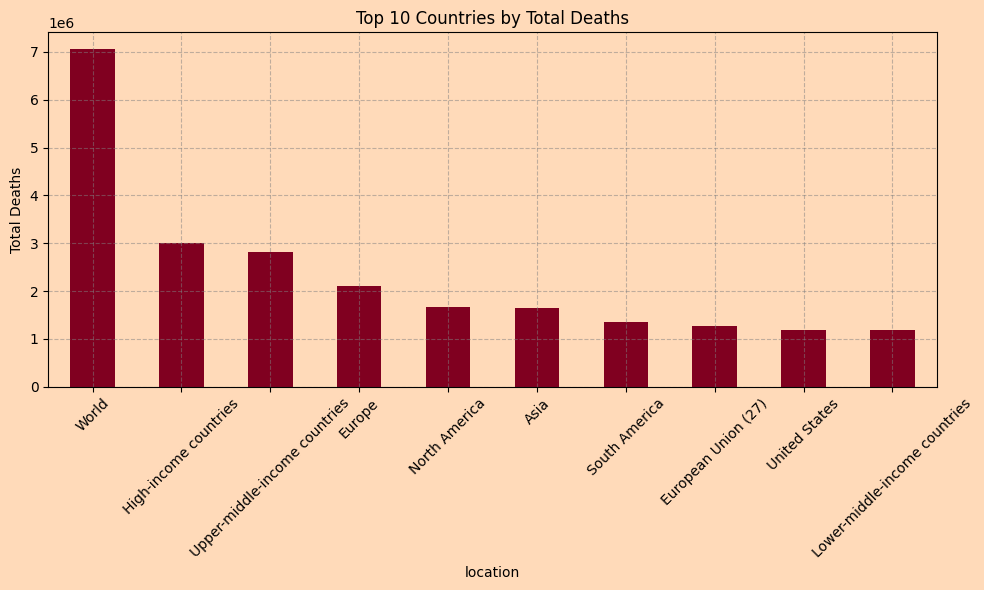

In [40]:
# Step 11: Plot Top 10 Countries by Total Deaths with Burgundy Bars and Peach Background

# Get top 10 countries by total deaths
death_data = latest.groupby('location')['total_deaths'].sum().sort_values(ascending=False).head(10)

# Create a custom figure and axes for background and bar styling
fig, ax = plt.subplots(figsize=(10, 6))

# Set peach background color
fig.patch.set_facecolor('#FFDAB9')  # Peach (outer background)
ax.set_facecolor('#FFDAB9')         # Peach (plot area background)

# Plot the bar chart with burgundy bars
death_data.plot(kind='bar', ax=ax, color='#800020')  # Burgundy bar color

# Customize chart title and labels
ax.set_title("Top 10 Countries by Total Deaths", color='black')
ax.set_ylabel("Total Deaths", color='black')
ax.tick_params(axis='x', colors='black', rotation=45)
ax.tick_params(axis='y', colors='black')
ax.grid(True, linestyle='--', color='gray', alpha=0.5)

plt.tight_layout()
plt.show()






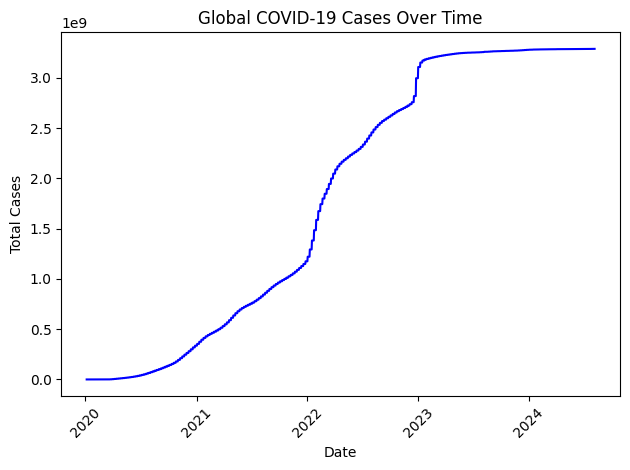

In [41]:
# Step 12: Plot Total global cases per date
global_trend = df.groupby('date')['total_cases'].sum()

plt.plot(pd.to_datetime(global_trend.index), global_trend.values, color='blue')
plt.title("Global COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


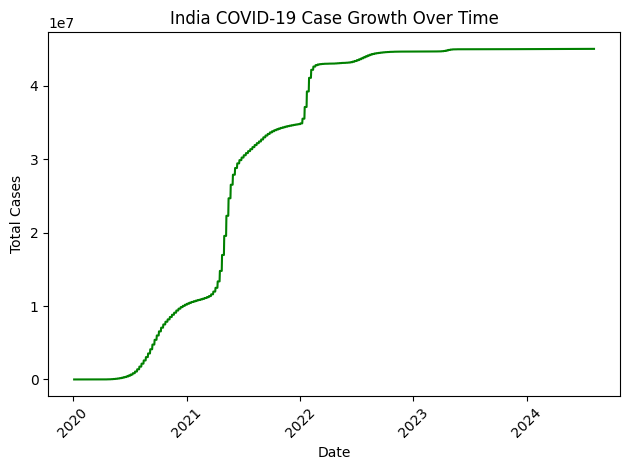

In [42]:
# Step 13:  Plot Total COVID-19 Cases Over Time in India

india = df[df['location'] == 'India']
plt.plot(pd.to_datetime(india['date']), india['total_cases'], label="India", color='green')

plt.title("India COVID-19 Case Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
# Step 14: Calculate and Display Top 10 Countries by COVID-19 Death Rate (Latest Data)

latest['death_rate'] = (latest['total_deaths'] / latest['total_cases']) * 100
death_rate_sorted = latest[['location', 'death_rate']].sort_values(by='death_rate', ascending=False).head(10)

print(death_rate_sorted)


                      location  death_rate
426086                   Yemen   18.074508
367607                   Sudan    7.885237
374303                   Syria    5.508246
355889                 Somalia    4.979147
302690                    Peru    4.881293
107157                   Egypt    4.811801
245371                  Mexico    4.390745
48559   Bosnia and Herzegovina    4.060783
212061                 Liberia    3.707440
1673               Afghanistan    3.400308


/tmp/ipython-input-43-441800094.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['death_rate'] = (latest['total_deaths'] / latest['total_cases']) * 100


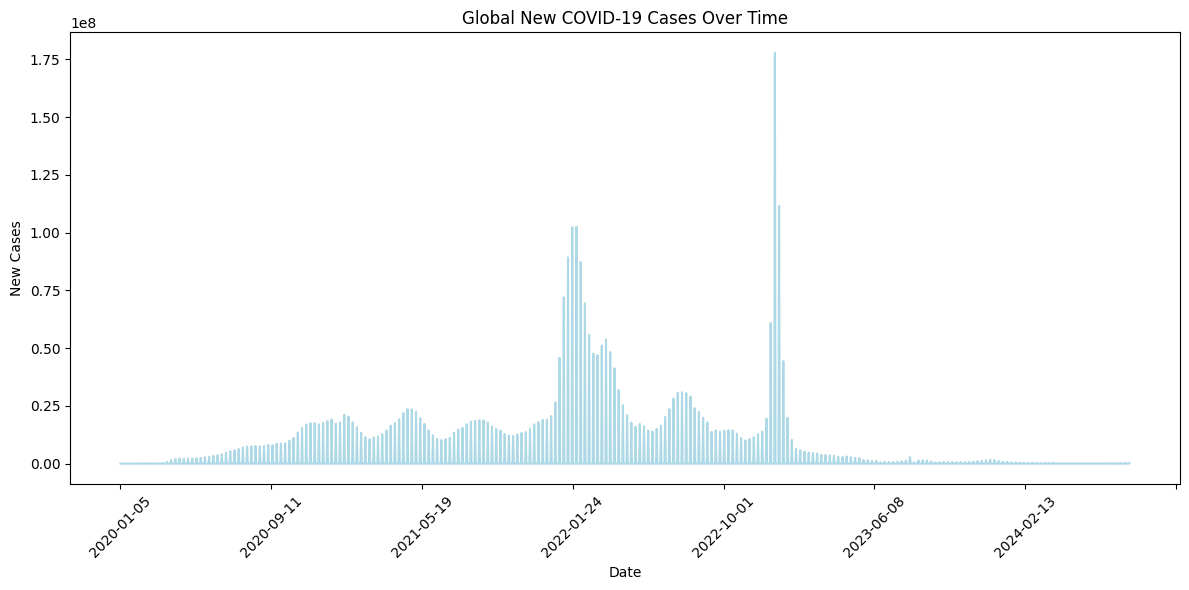

In [44]:
# Step 15: Plot Global Daily New COVID-19 Cases Over Time

daily_cases = df.groupby('date')['new_cases'].sum()
daily_cases.plot(figsize=(12, 6), color='lightblue')
plt.title("Global New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


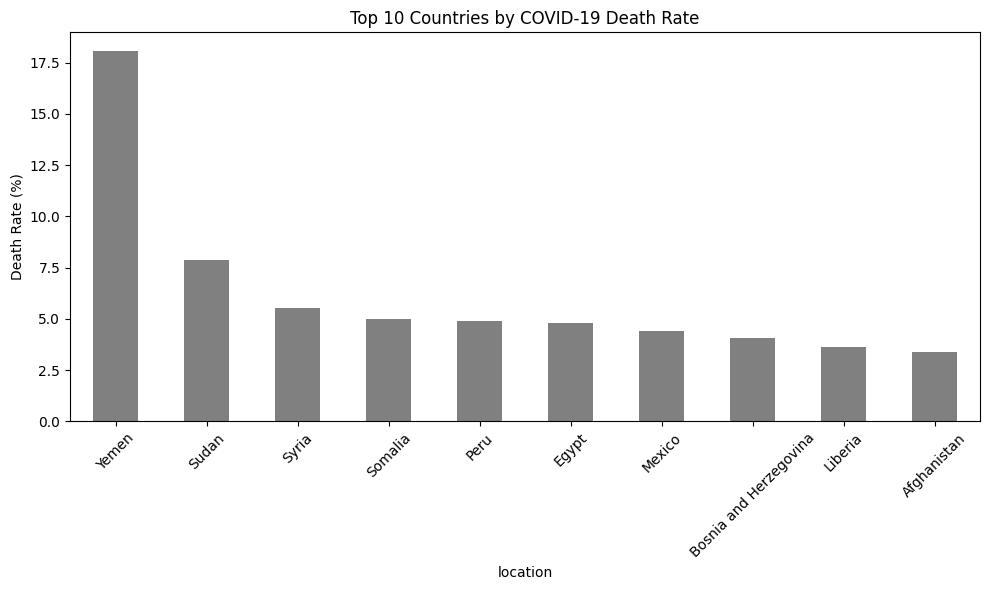

In [45]:
# Step 16: Calculate and Plot Top 10 Countries by COVID-19 Death Rate

death_rate = df.groupby('location')[['total_cases', 'total_deaths']].max()
death_rate['death_rate (%)'] = (death_rate['total_deaths'] / death_rate['total_cases']) * 100

# Top 10 by death rate
top_death_rate = death_rate['death_rate (%)'].sort_values(ascending=False).head(10)
top_death_rate.plot(kind='bar', color='grey', figsize=(10, 6))
plt.title("Top 10 Countries by COVID-19 Death Rate")
plt.ylabel("Death Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
# Step 17: Summary of key insights

print("""
Summary & Key Insights
The top 10 countries with the highest total deaths from COVID-19 reveal the global hotspots most severely affected, with countries like the United States and Brazil consistently leading.

India’s growth trend shows several clear waves, reflecting both surges and periods of containment, aligning with real-world lockdowns and vaccination phases.

New case trends across India, the US, Brazil, and Russia highlight differing pandemic curves, giving insight into how various regions managed outbreaks.

Using groupings by date and location, we visualized the global spread over time, showing a sharp initial rise in 2020 followed by multiple waves.

The visualizations not only depict raw numbers but also help understand patterns, trends, and comparative severity between countries.""")


Summary & Key Insights
The top 10 countries with the highest total deaths from COVID-19 reveal the global hotspots most severely affected, with countries like the United States and Brazil consistently leading.

India’s growth trend shows several clear waves, reflecting both surges and periods of containment, aligning with real-world lockdowns and vaccination phases.

New case trends across India, the US, Brazil, and Russia highlight differing pandemic curves, giving insight into how various regions managed outbreaks.

Using groupings by date and location, we visualized the global spread over time, showing a sharp initial rise in 2020 followed by multiple waves.

The visualizations not only depict raw numbers but also help understand patterns, trends, and comparative severity between countries.
